In [136]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import warnings # Ignores any warning
warnings.filterwarnings("ignore")
#import pandas_profiling
import pandas as pd
import numpy as np
from numba import jit
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import warnings
warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import gc
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [137]:
features  = pd.read_csv('data/Features data set.csv')
sales = pd.read_csv('data/sales data-set.csv')
stores = pd.read_csv('data/stores data-set.csv')

In [138]:
df = pd.merge(sales,stores, on='Store',how='left')
df1 = pd.merge(df,features, on=['Store','Date'],how='left')
df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,05/02/2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,12/02/2010,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,19/02/2010,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,26/02/2010,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,05/03/2010,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [139]:
df1.Date = pd.to_datetime(df1.Date,format='%d/%m/%Y')
df1['week'] = df1.Date.dt.week
df1['year'] = df1.Date.dt.year
df1['year_week'] =  df1['year'].astype(str)+ df1['week'].astype(str)

df1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,week,year,year_week
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,2010,20105
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,6,2010,20106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,7,2010,20107
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,8,2010,20108
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,9,2010,20109


In [140]:
#DROP SALES WITH NEGATIVE VALUE
df1.drop(df1[df1.Weekly_Sales < 0].index, inplace=True)

#Is Holiday to 1 and 0
df1.IsHoliday_x = df1.IsHoliday_x.astype('uint8')
df1.IsHoliday_y = df1.IsHoliday_y.astype('uint8')

#nan to 0
df1 = df1.fillna(0)




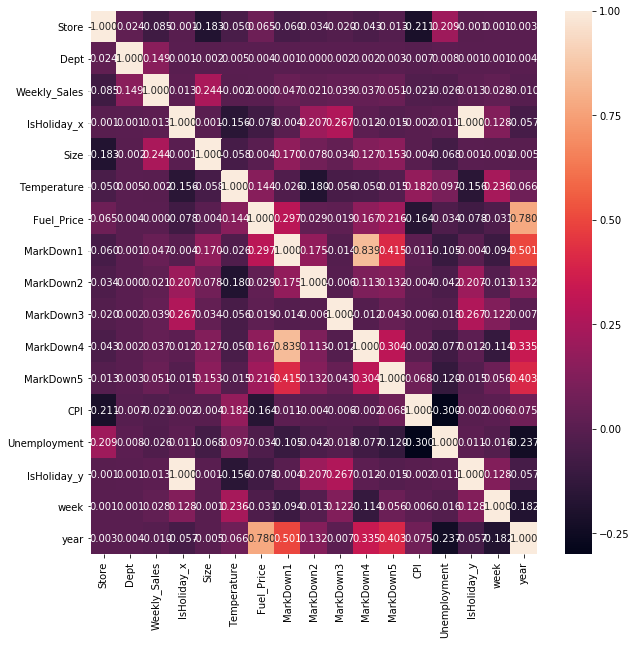

In [141]:
import seaborn as sns
correlation = df1.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, 
            annot=True, fmt=".3f",
            xticklabels=correlation.columns.values,
            yticklabels=correlation.columns.values)
plt.show()

In [142]:
correlation['Weekly_Sales'].abs().sort_values(ascending=False)

Weekly_Sales    1.000000
Size            0.244089
Dept            0.148704
Store           0.085099
MarkDown5       0.050612
MarkDown1       0.047260
MarkDown3       0.038530
MarkDown4       0.037481
week            0.027689
Unemployment    0.025831
CPI             0.021153
MarkDown2       0.020961
IsHoliday_x     0.012856
IsHoliday_y     0.012856
year            0.010004
Temperature     0.002333
Fuel_Price      0.000092
Name: Weekly_Sales, dtype: float64

In [143]:
to_encode = ['Dept', 'Type', 'week', 'year']
df1 = pd.get_dummies(df1, columns=to_encode)
df1.columns
df1.drop('Date', axis=1, inplace=True)



In [144]:
df1.year_week.unique()

array(['20105', '20106', '20107', '20108', '20109', '201010', '201011',
       '201012', '201013', '201014', '201015', '201016', '201017',
       '201018', '201019', '201020', '201021', '201022', '201023',
       '201024', '201025', '201026', '201027', '201028', '201029',
       '201030', '201031', '201032', '201033', '201034', '201035',
       '201036', '201037', '201038', '201039', '201040', '201041',
       '201042', '201043', '201044', '201045', '201046', '201047',
       '201048', '201049', '201050', '201051', '201052', '20111', '20112',
       '20113', '20114', '20115', '20116', '20117', '20118', '20119',
       '201110', '201111', '201112', '201113', '201114', '201115',
       '201116', '201117', '201118', '201119', '201120', '201121',
       '201122', '201123', '201124', '201125', '201126', '201127',
       '201128', '201129', '201130', '201131', '201132', '201133',
       '201134', '201135', '201136', '201137', '201138', '201139',
       '201140', '201141', '201142', '201143',

In [145]:
test = df1[df1.year_week.isin([201240, 201241, 201242, 201243])]
train = df1[~df1.year_week.isin([201240, 201241, 201242, 201243])]

In [146]:
X_test = test.drop('Weekly_Sales', axis=1)
y_test = test['Weekly_Sales']
X_train = train.drop('Weekly_Sales', axis=1)
y_train = train['Weekly_Sales']

In [147]:
model = RandomForestRegressor(n_estimators=20, criterion='mse', bootstrap=True, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
100-mape(np.expm1(y_test), np.expm1(y_pred))

ValueError: Found array with 0 sample(s) (shape=(0, 153)) while a minimum of 1 is required.